<p style="padding: 10px; background-color:#7FDBFF;color: Black;font-weight: bold;
          text-align: center; font-size:250%;">Diabetes Prediction</p>

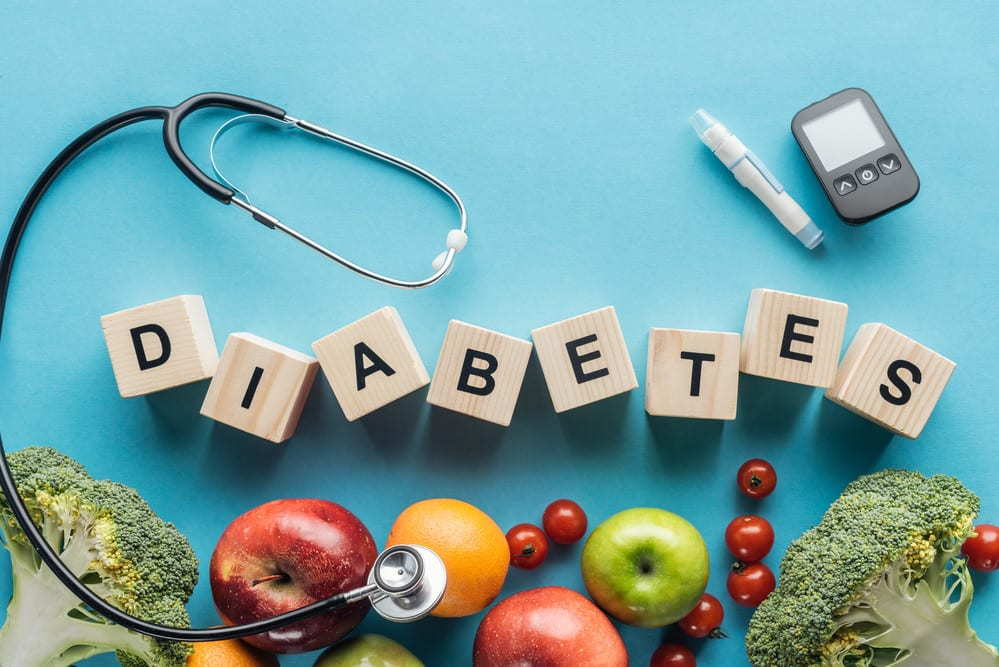

<a id = "1"></a><h1 id="Introduction"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Introduction</span></h1>

**Diabetes Mellitus**, which is generally referred to as sugar among the people, is the presence of sugar in the blood in general when glucose (sugar) is well above normal, and accordingly, sugar should not contain sugar. Its different derivatives are among the common and most common derivatives in the world. It can be targeted by a person with international disease intact.

<a id = "2"></a><h1 id="Dataset Story"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Dataset Story</span></h1>


The dataset is available at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. It is part of the large data set.

Phoenix, a major city in the State of Arizona in the USA, is one of the best experiences. Underwear on Pima Indian women who are aged and over using for.

It consists of 768 observations and 8 numerical independent variables.

The target variable is specified as "**outcome**";

**1** diabetes test result being positive,
**0** indicates negative.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable ( 0 - 1)

<a id = "3"></a><h1 id="Importing Libraries and Utilities"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Importing Libraries and Utilities</span></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

<a id = "4"></a><h1 id="Load and Check Data"><span class="label label-default" style="background-color:#f5b0d0; font-size:30px; color: Black; ">Load and Check Data</span></h1>

In [2]:
data = pd.read_csv("diabetes_lab_4.csv")
df = data.copy()

In [3]:
def check_df(dataframe: object, head: object = 5) -> object:
    print("########################### Shape ###########################")
    print(dataframe.shape)

    print("########################### Types ###########################")
    print(dataframe.dtypes)

    print("########################### Head ###########################")
    print(dataframe.head(head))

    print("########################### Tail ###########################")
    print(dataframe.tail(head))

    print("########################### NA ###########################")
    print(dataframe.isnull().sum())

    print("########################### Quantiles ###########################")
    print(dataframe.quantile([0, 0.05,0.1, 0.25, 0.50,0.75, 0.90, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

########################### Shape ###########################
(768, 9)
########################### Types ###########################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
########################### Head ###########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89     

In [34]:
df.groupby(['Outcome']).agg({"Age":["mean", "median"],
                            "Glucose":["mean","median"],
                            "Pregnancies":["mean", "median"],
                            "BMI":["mean", "median"],
                            "SkinThickness":["mean", "median"]})

Age        Glucose        Pregnancies           BMI        SkinThickness       
          mean median    mean median        mean median   mean median          mean median
Outcome                                                                                   
0       31.190     27 109.980    107       3.298      2 30.304 30.050        19.664     21
1       37.067     36 141.257    140       4.866      4 35.143 34.250        22.164     27

<a id = "5"></a><h1 id="Exploratory Data Analysis"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Exploratory Data Analysis</span></h1>

In [35]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


## Analysis of Categorical Variables

   Outcome  Ratio
0      500 65.104
1      268 34.896


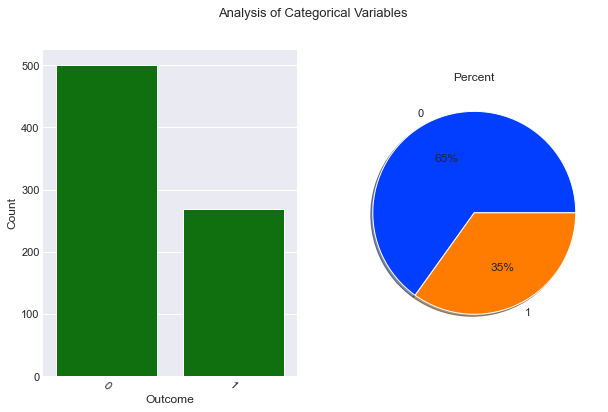

In [36]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        plt.style.use('seaborn-darkgrid')
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(x=dataframe[col_name], color="green", ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count')
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)
        ax[0, 1] = plt.pie(dataframe[col_name].value_counts().values, labels=dataframe[col_name].value_counts().keys(),
                           colors=sns.color_palette('bright'), shadow=True, autopct='%.0f%%')
        plt.title("Percent")
        fig.set_size_inches(10, 6)
        fig.suptitle('Analysis of Categorical Variables', fontsize=13)
        plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=True)

## Analysis of Numerical Variables

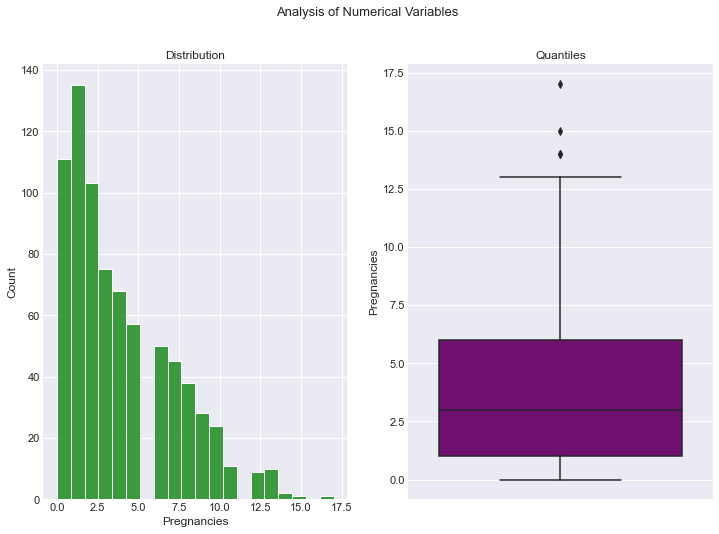

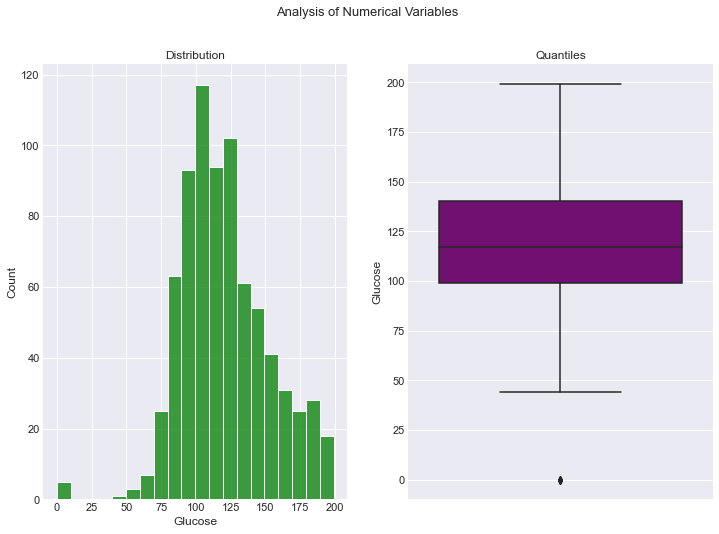

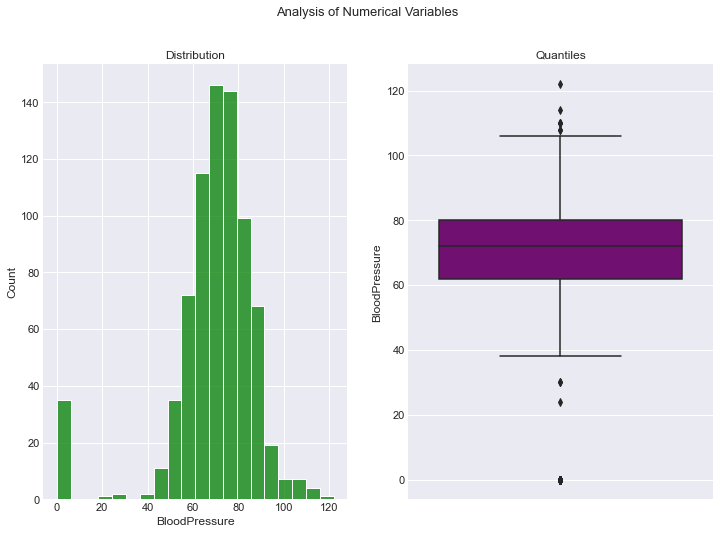

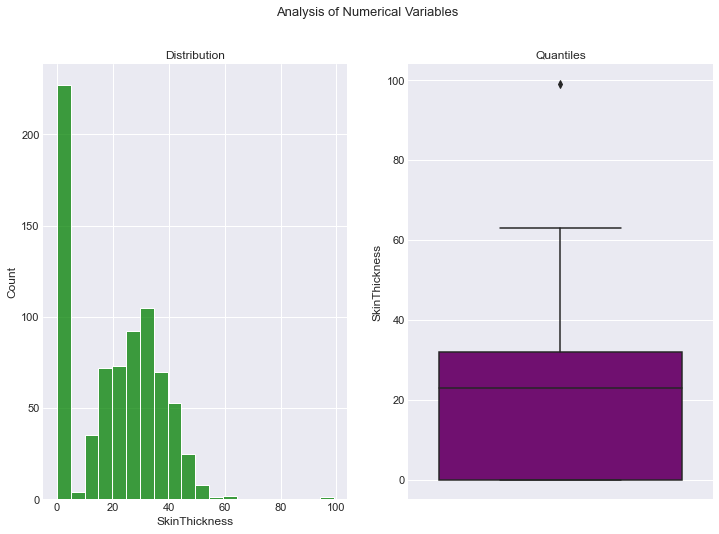

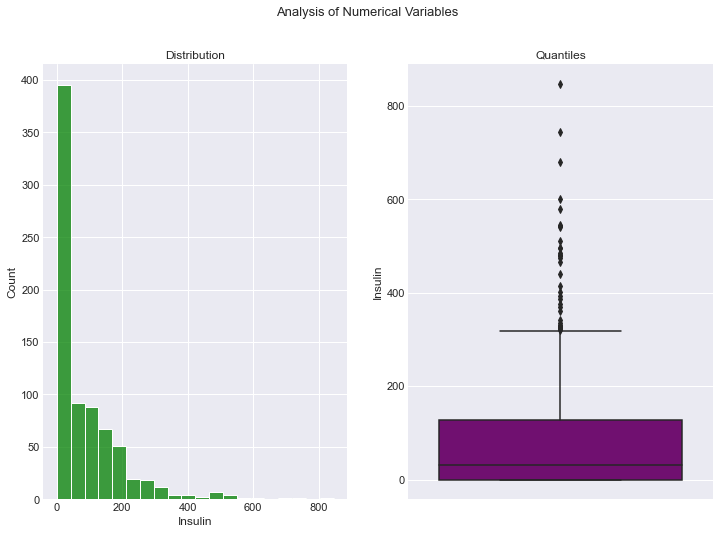

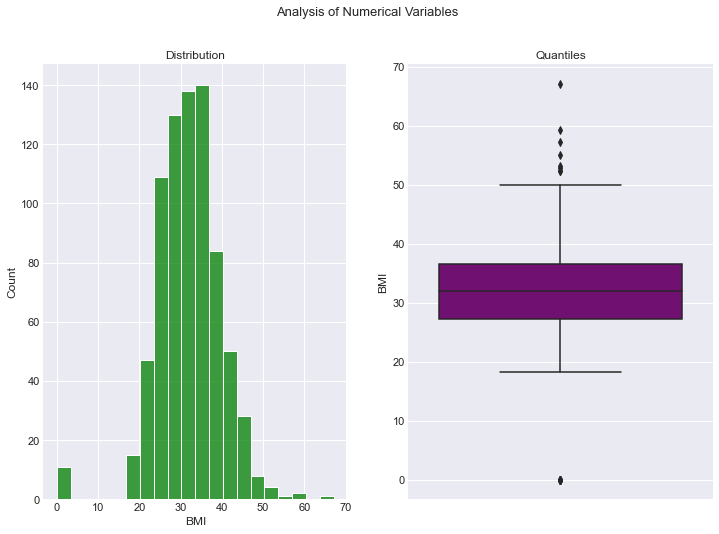

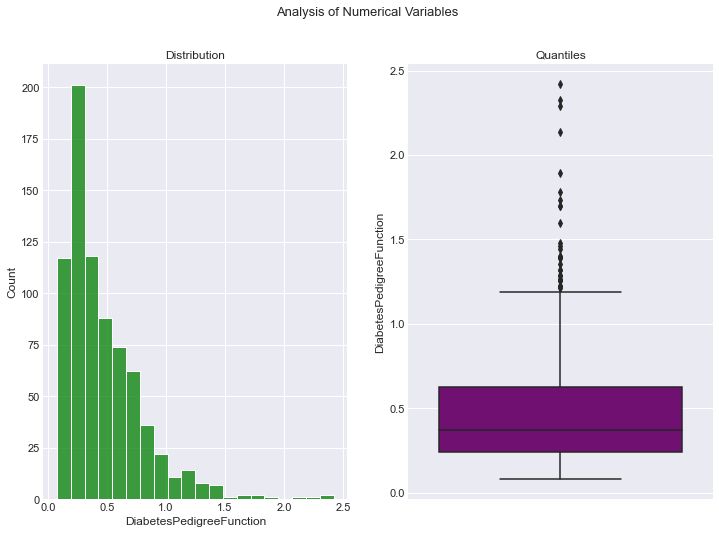

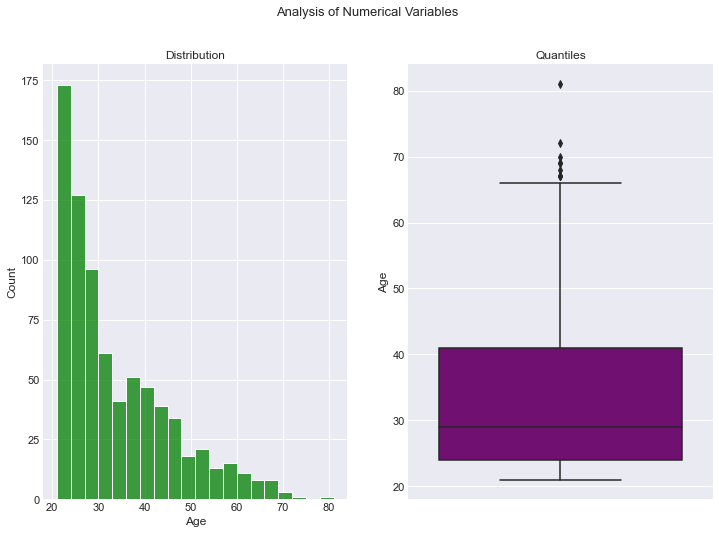

In [37]:
def num_summary(dataframe, numerical_col):
    # setup the plot grid
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(1, 2)
    ax = np.reshape(ax, (1, 2))
    ax[0, 0] = sns.histplot(x=dataframe[numerical_col], color="green", bins=20, ax=ax[0, 0])
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].set_title('Distribution')
    ax[0, 1] = sns.boxplot(y=dataframe[numerical_col], color="purple", ax=ax[0, 1])
    ax[0, 1].set_title('Quantiles')

    fig.set_size_inches(12, 8)
    fig.suptitle('Analysis of Numerical Variables', fontsize=13)
    plt.show()

for col in df[num_cols]:
    num_summary(df, col)

## Analysis of Correlation

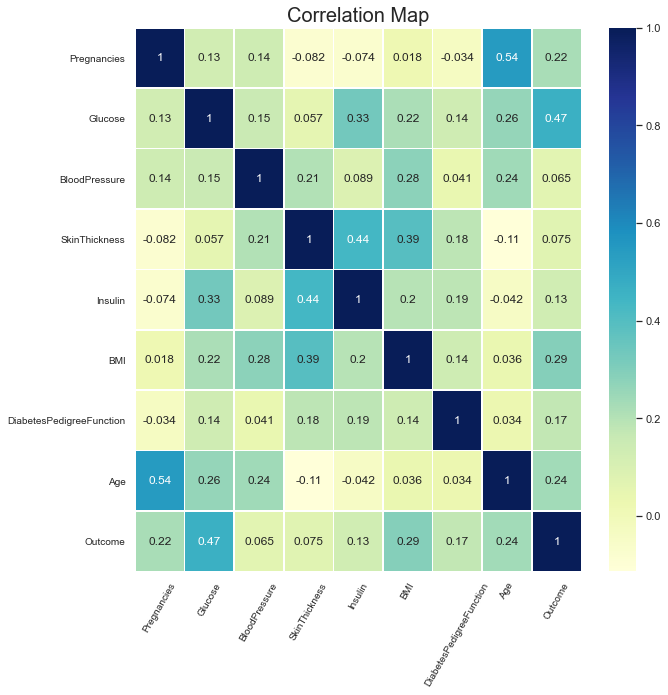

In [38]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (10, 10)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(df, plot=True)

<a id = "6"></a><h1 id="Data Preprocessing"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Data Preprocessing</span></h1>

## Missing Values

In [39]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

## Outliers

In [40]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

for col in num_cols:
    print(outlier_thresholds(df, col))

(-15.0, 25.0)
(-74.0, 334.0)
(-38.249999999999986, 166.95)
(-66.0, 110.0)
(-439.5, 732.5)
(-12.09249999999999, 78.2875)
(-1.3483999999999996, 2.621599999999999)
(-34.5, 113.5)


In [41]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df,col)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.637,114.243,0.000,0.000,30.500,127.250,732.500
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


<a id = "7"></a><h1 id="Feature Extraction"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Feature Extraction</span></h1>

## BMI

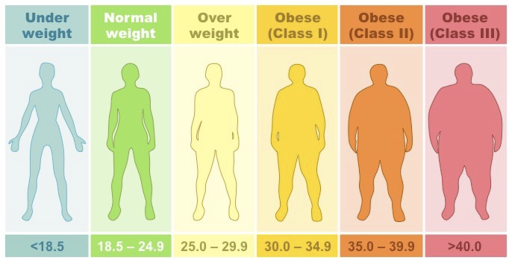

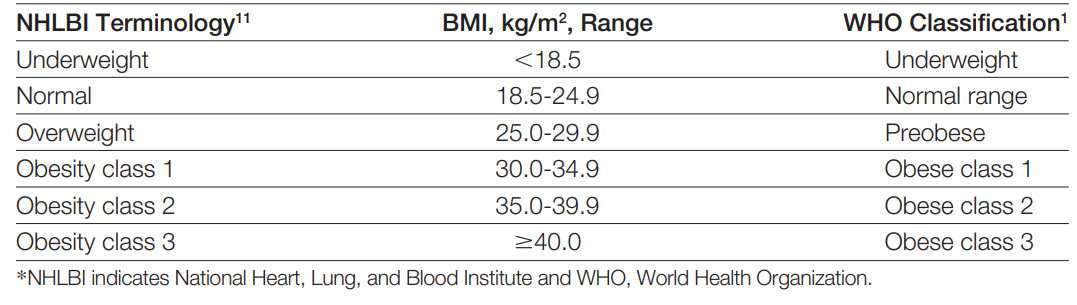
[https://www.researchgate.net/figure/Weight-Classification-by-Body-Mass-Index-BMI_tbl1_12753525](http://)

                 BMI_Cat  Ratio
obesity_class_1      221 28.776
overweight           180 23.438
obesity_class_2      148 19.271
normal_weight        108 14.062
obesity_class_3       96 12.500
underweight           15  1.953


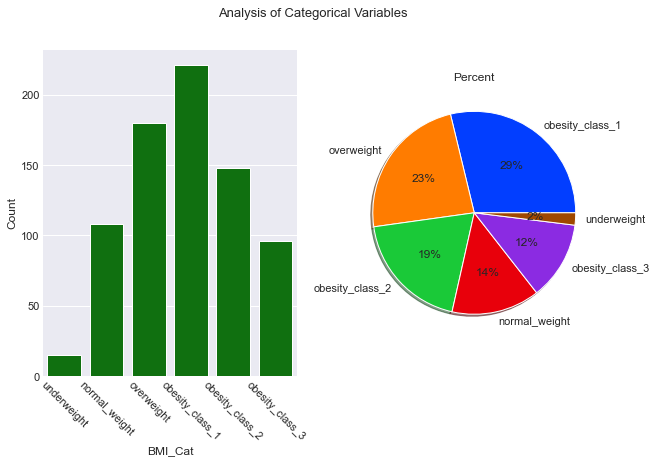

In [43]:
bmi_labels = ["underweight", "normal_weight", "overweight", "obesity_class_1", "obesity_class_2", "obesity_class_3"]
df['BMI_Cat'] = pd.cut(df['BMI'], [-1, 18.5, 25, 30, 35, 40, df['BMI'].max()], 
                       labels=bmi_labels)
cat_summary(df,"BMI_Cat", plot=True)

## Age

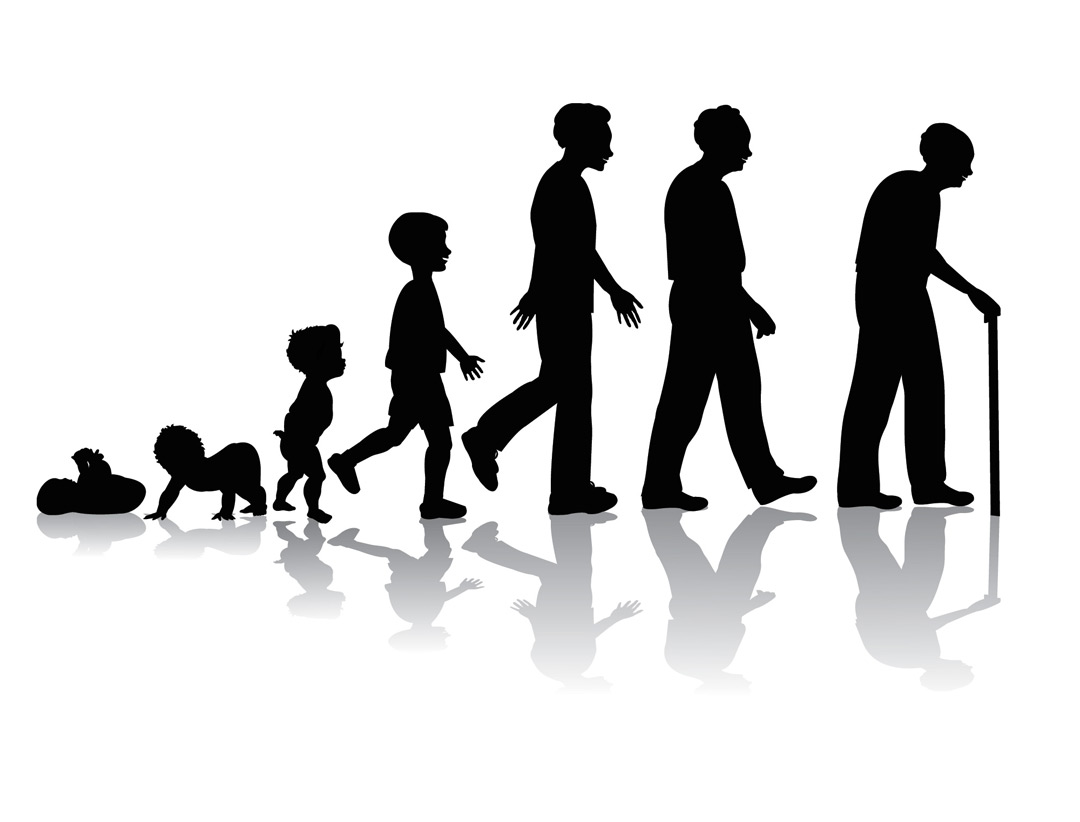

            New_Age_Cat  Ratio
youngmale           396 51.562
maturemale          291 37.891
seniormale           81 10.547


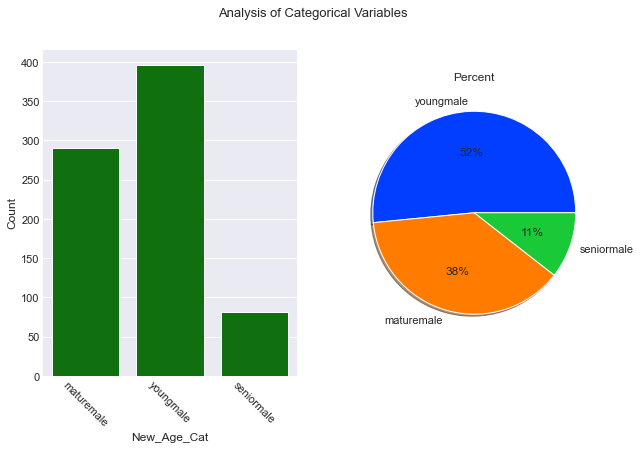

In [44]:
df["New_Age_Cat"] = df["Age"].apply(lambda x: "youngmale" if x < 30 else ("maturemale" if 30 <= x <= 50 else "seniormale"))
cat_summary(df,"New_Age_Cat", plot=True)

## Glucose

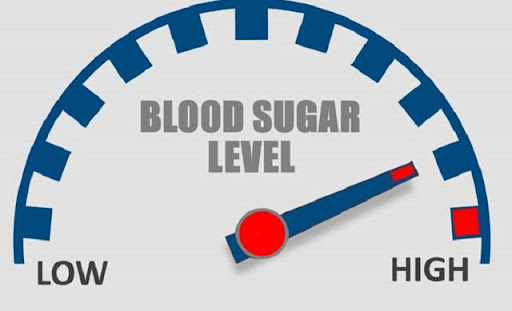

**Oral glucose tolerance test**:

For this test, you fast overnight, and the fasting blood sugar level is measured. Then you drink a sugary liquid, and blood sugar levels are tested periodically for the next two hours.

* A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal.
* A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. 
* A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

        Glucose_Cat  Ratio
Normal          571 74.349
IGT             197 25.651


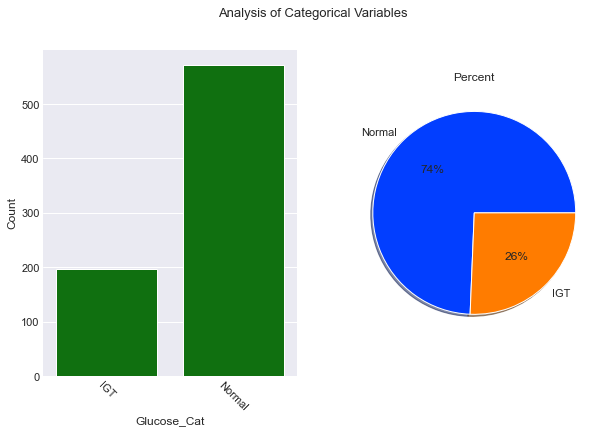

In [45]:
df["Glucose_Cat"] = df["Glucose"].apply(lambda x: "Normal" if x < 140 else ("IGT" if 140 <= x <= 200 else "DM"))
cat_summary(df,"Glucose_Cat", plot=True)

## Blood Pressure

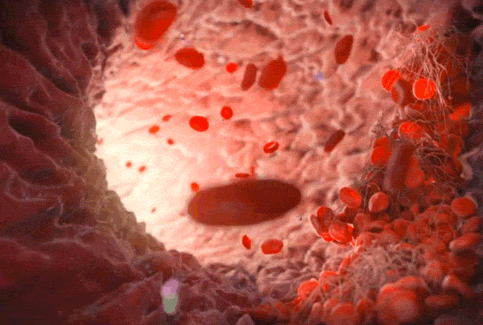

**Blood Pressure (BP)** is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system. When used without qualification, the term "blood pressure" refers to the pressure in the large arteries. 

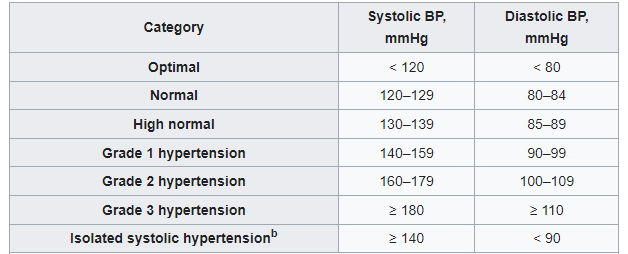 https://en.wikipedia.org/wiki/Blood_pressure

                      Blood_Pressure_Cat  Ratio
optimal                              603 78.516
high_normal                           68  8.854
normal                                59  7.682
grade_1_hypertension                  25  3.255
grade_2_hypertension                  11  1.432
grade_3_hypertension                   2  0.260


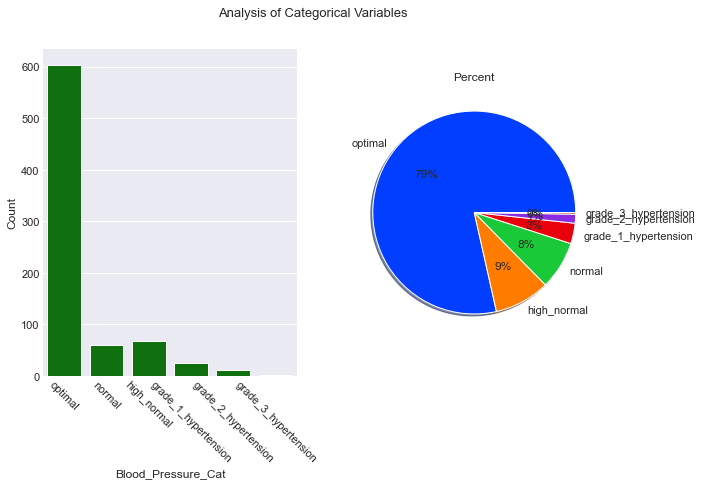

In [46]:
bp_labels = ["optimal", "normal", "high_normal", "grade_1_hypertension", "grade_2_hypertension", "grade_3_hypertension"]
df['Blood_Pressure_Cat'] = pd.cut(df['BloodPressure'], [-1, 80,  85, 90, 100, 110, df['BloodPressure'].max()], labels=bp_labels)
cat_summary(df,"Blood_Pressure_Cat", plot=True)

<a id = "8"></a><h1 id="Encoding"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Encoding</span></h1>

## Label Encoding

In [47]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
len(binary_cols)

1

In [48]:
for col in binary_cols:
    label_encoder(df, col)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Cat,New_Age_Cat,Glucose_Cat,Blood_Pressure_Cat
0,6.000,148.000,72.000,35.000,0.000,33.600,0.627,50.000,1,obesity_class_1,maturemale,0,optimal
1,1.000,85.000,66.000,29.000,0.000,26.600,0.351,31.000,0,overweight,maturemale,1,optimal
2,8.000,183.000,64.000,0.000,0.000,23.300,0.672,32.000,1,normal_weight,maturemale,0,optimal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,overweight,youngmale,1,optimal
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,obesity_class_3,maturemale,1,optimal


## One-Hot Encoding

In [49]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Cat,BMI_Cat_normal_weight,BMI_Cat_overweight,BMI_Cat_obesity_class_1,BMI_Cat_obesity_class_2,BMI_Cat_obesity_class_3,New_Age_Cat_seniormale,New_Age_Cat_youngmale,Blood_Pressure_Cat_normal,Blood_Pressure_Cat_high_normal,Blood_Pressure_Cat_grade_1_hypertension,Blood_Pressure_Cat_grade_2_hypertension,Blood_Pressure_Cat_grade_3_hypertension
0,6.000,148.000,72.000,35.000,0.000,33.600,0.627,50.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.000,85.000,66.000,29.000,0.000,26.600,0.351,31.000,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,8.000,183.000,64.000,0.000,0.000,23.300,0.672,32.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 22
cat_cols: 14
num_cols: 8
cat_but_car: 0
num_but_cat: 14


## Standart Scaler

In [22]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

check_df(df)

########################### Shape ###########################
(768, 22)
########################### Types ###########################
Pregnancies                                float64
Glucose                                    float64
BloodPressure                              float64
SkinThickness                              float64
Insulin                                    float64
BMI                                        float64
DiabetesPedigreeFunction                   float64
Age                                        float64
Outcome                                      int64
Glucose_Cat                                  int64
BMI_Cat_normal_weight                        uint8
BMI_Cat_overweight                           uint8
BMI_Cat_obesity_class_1                      uint8
BMI_Cat_obesity_class_2                      uint8
BMI_Cat_obesity_class_3                      uint8
New_Age_Cat_seniormale                       uint8
New_Age_Cat_youngmale                        uint8


<a id = "9"></a><h1 id="Model"><span class="label label-default" style="background-color:#f5c0c0; font-size:30px; color: Black; ">Model</span></h1>

In [23]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

## Model Validation: 10-Fold Cross Validation

In [24]:
cv_results = cross_validate(log_model,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

## Predict

In [25]:
y_pred = log_model.predict(X)

## Model Evaluation

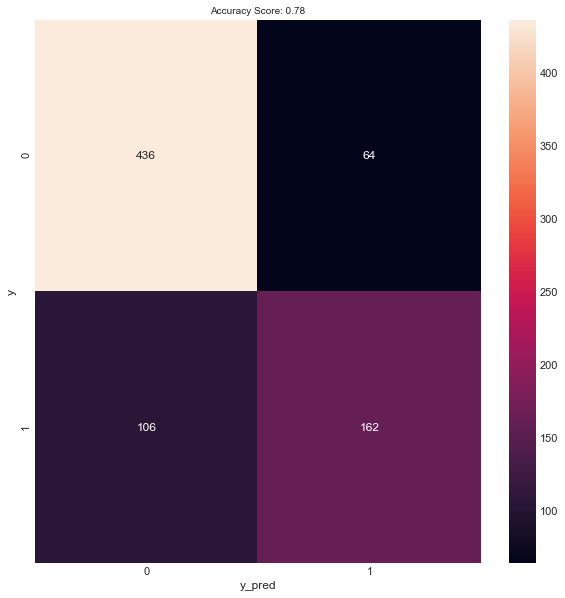

In [26]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [27]:
# Başarı skorları:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       500
           1       0.72      0.60      0.66       268

    accuracy                           0.78       768
   macro avg       0.76      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



In [28]:
# ROC AUC
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8544626865671641

In [29]:
# Prediction for A New Observation

X.columns

random_user = X.sample(1, random_state=42)

log_model.predict(random_user)

array([0])

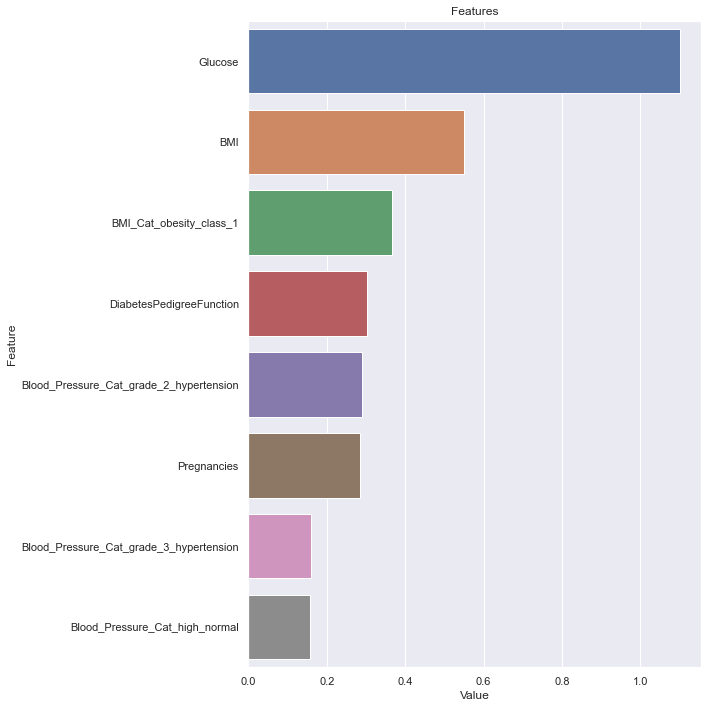

In [30]:
feature_imp = pd.DataFrame({'Value': log_model.coef_[0], 'Feature': X.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:8])
plt.title('Features')
plt.tight_layout()
plt.show()